# Part 1 | Visualizing Economic Data

## Part 1.3 Continuous Data by Category

### Coffee Shop Receipt Times

In [73]:
sales = pd.read_csv('Data/Part_1_3_Coffee_Sales_Reciepts_raw.csv')

def time_to_seconds(time_str):
    """ Convert 'HH:MM:SS' to total seconds since midnight. """
    
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

sales['Seconds'] = sales.transaction_time.apply(time_to_seconds)

def time_to_hour(time_str):
    """ Convert 'HH:MM:SS' to hour. """
    
    h, m, s = map(int, time_str.split(':'))
    return h
    
sales['Hours'] = sales.transaction_time.apply(time_to_hour)

def rename_shop(name):
    shop_name_dict = {3:'A', 5:'B', 8:'C'}
    return shop_name_dict[name]
    
sales['Shop'] = sales['sales_outlet_id'].apply(rename_shop)

sales.to_csv('Data/Part_1_3_Coffee_Sales_Reciepts.csv')

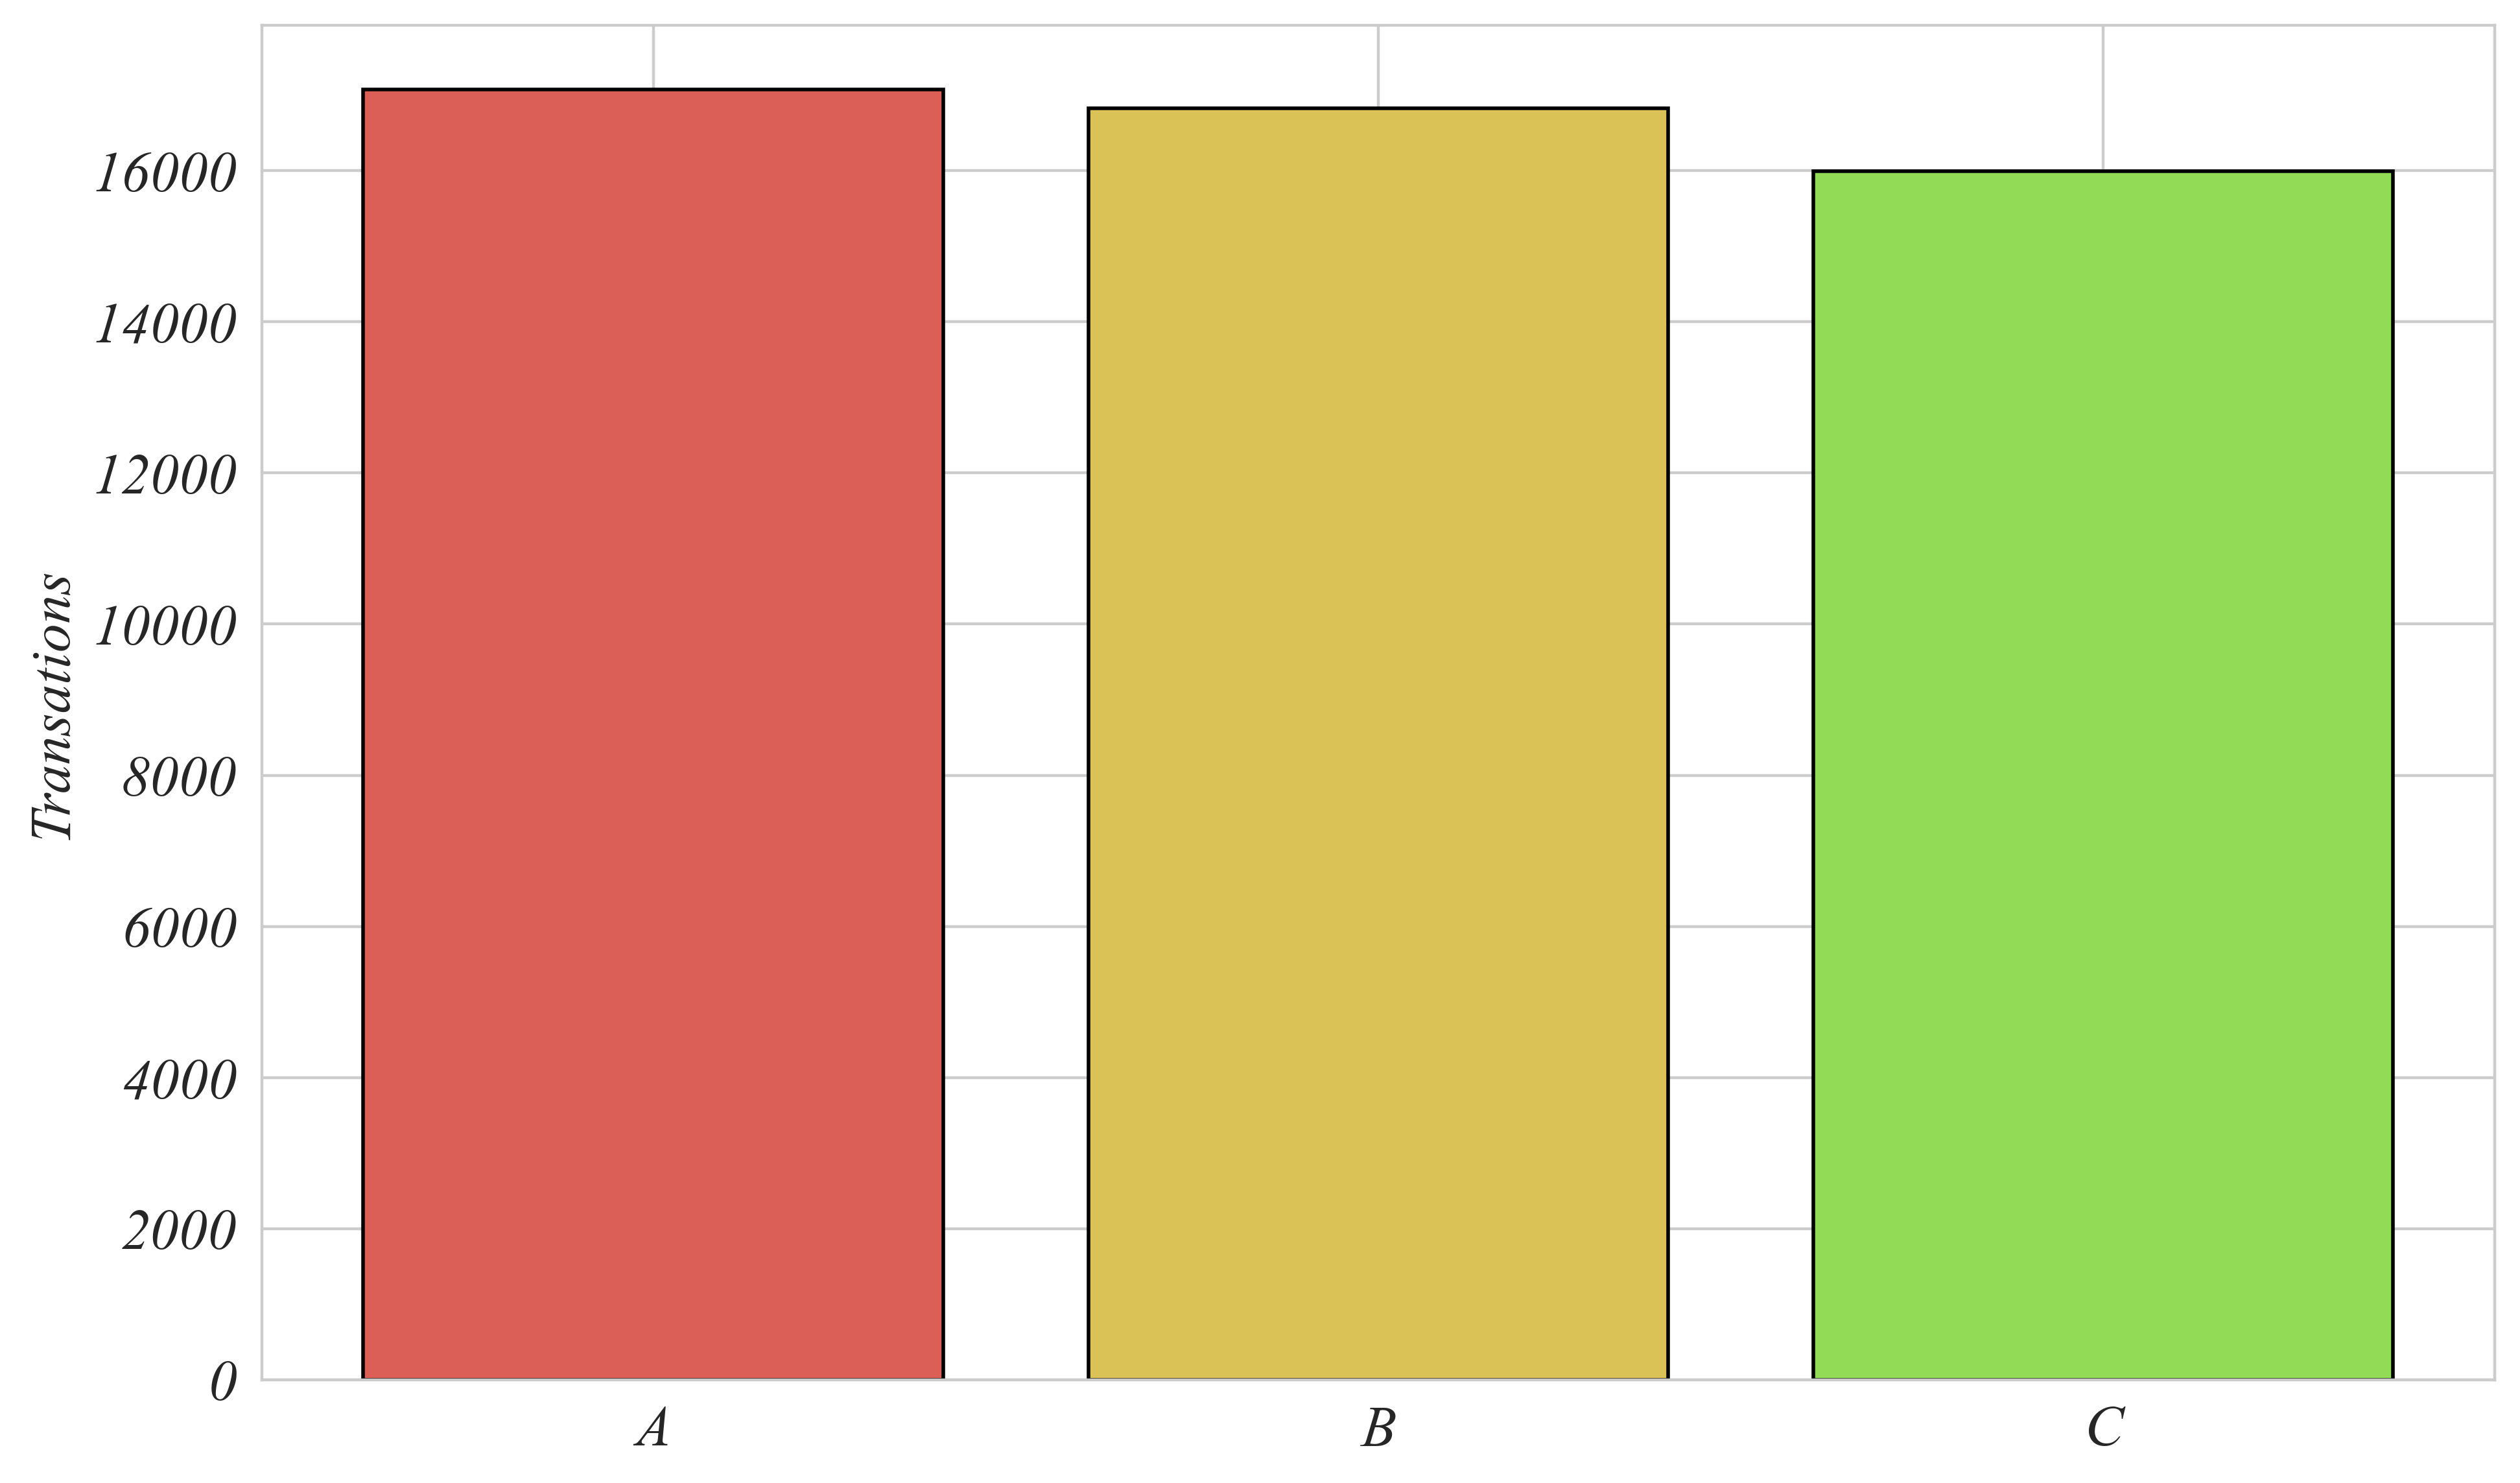

In [1]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

sales = pd.read_csv('Data/Part_1_3_Coffee_Sales_Reciepts.csv')
sales_counts = sales.sales_outlet_id.value_counts()

plt.bar(['A','B','C'], sales_counts.values, color=category_color_pal, edgecolor='black')
plt.ylabel('Transations')
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Coffee_Shop_Transations.png')

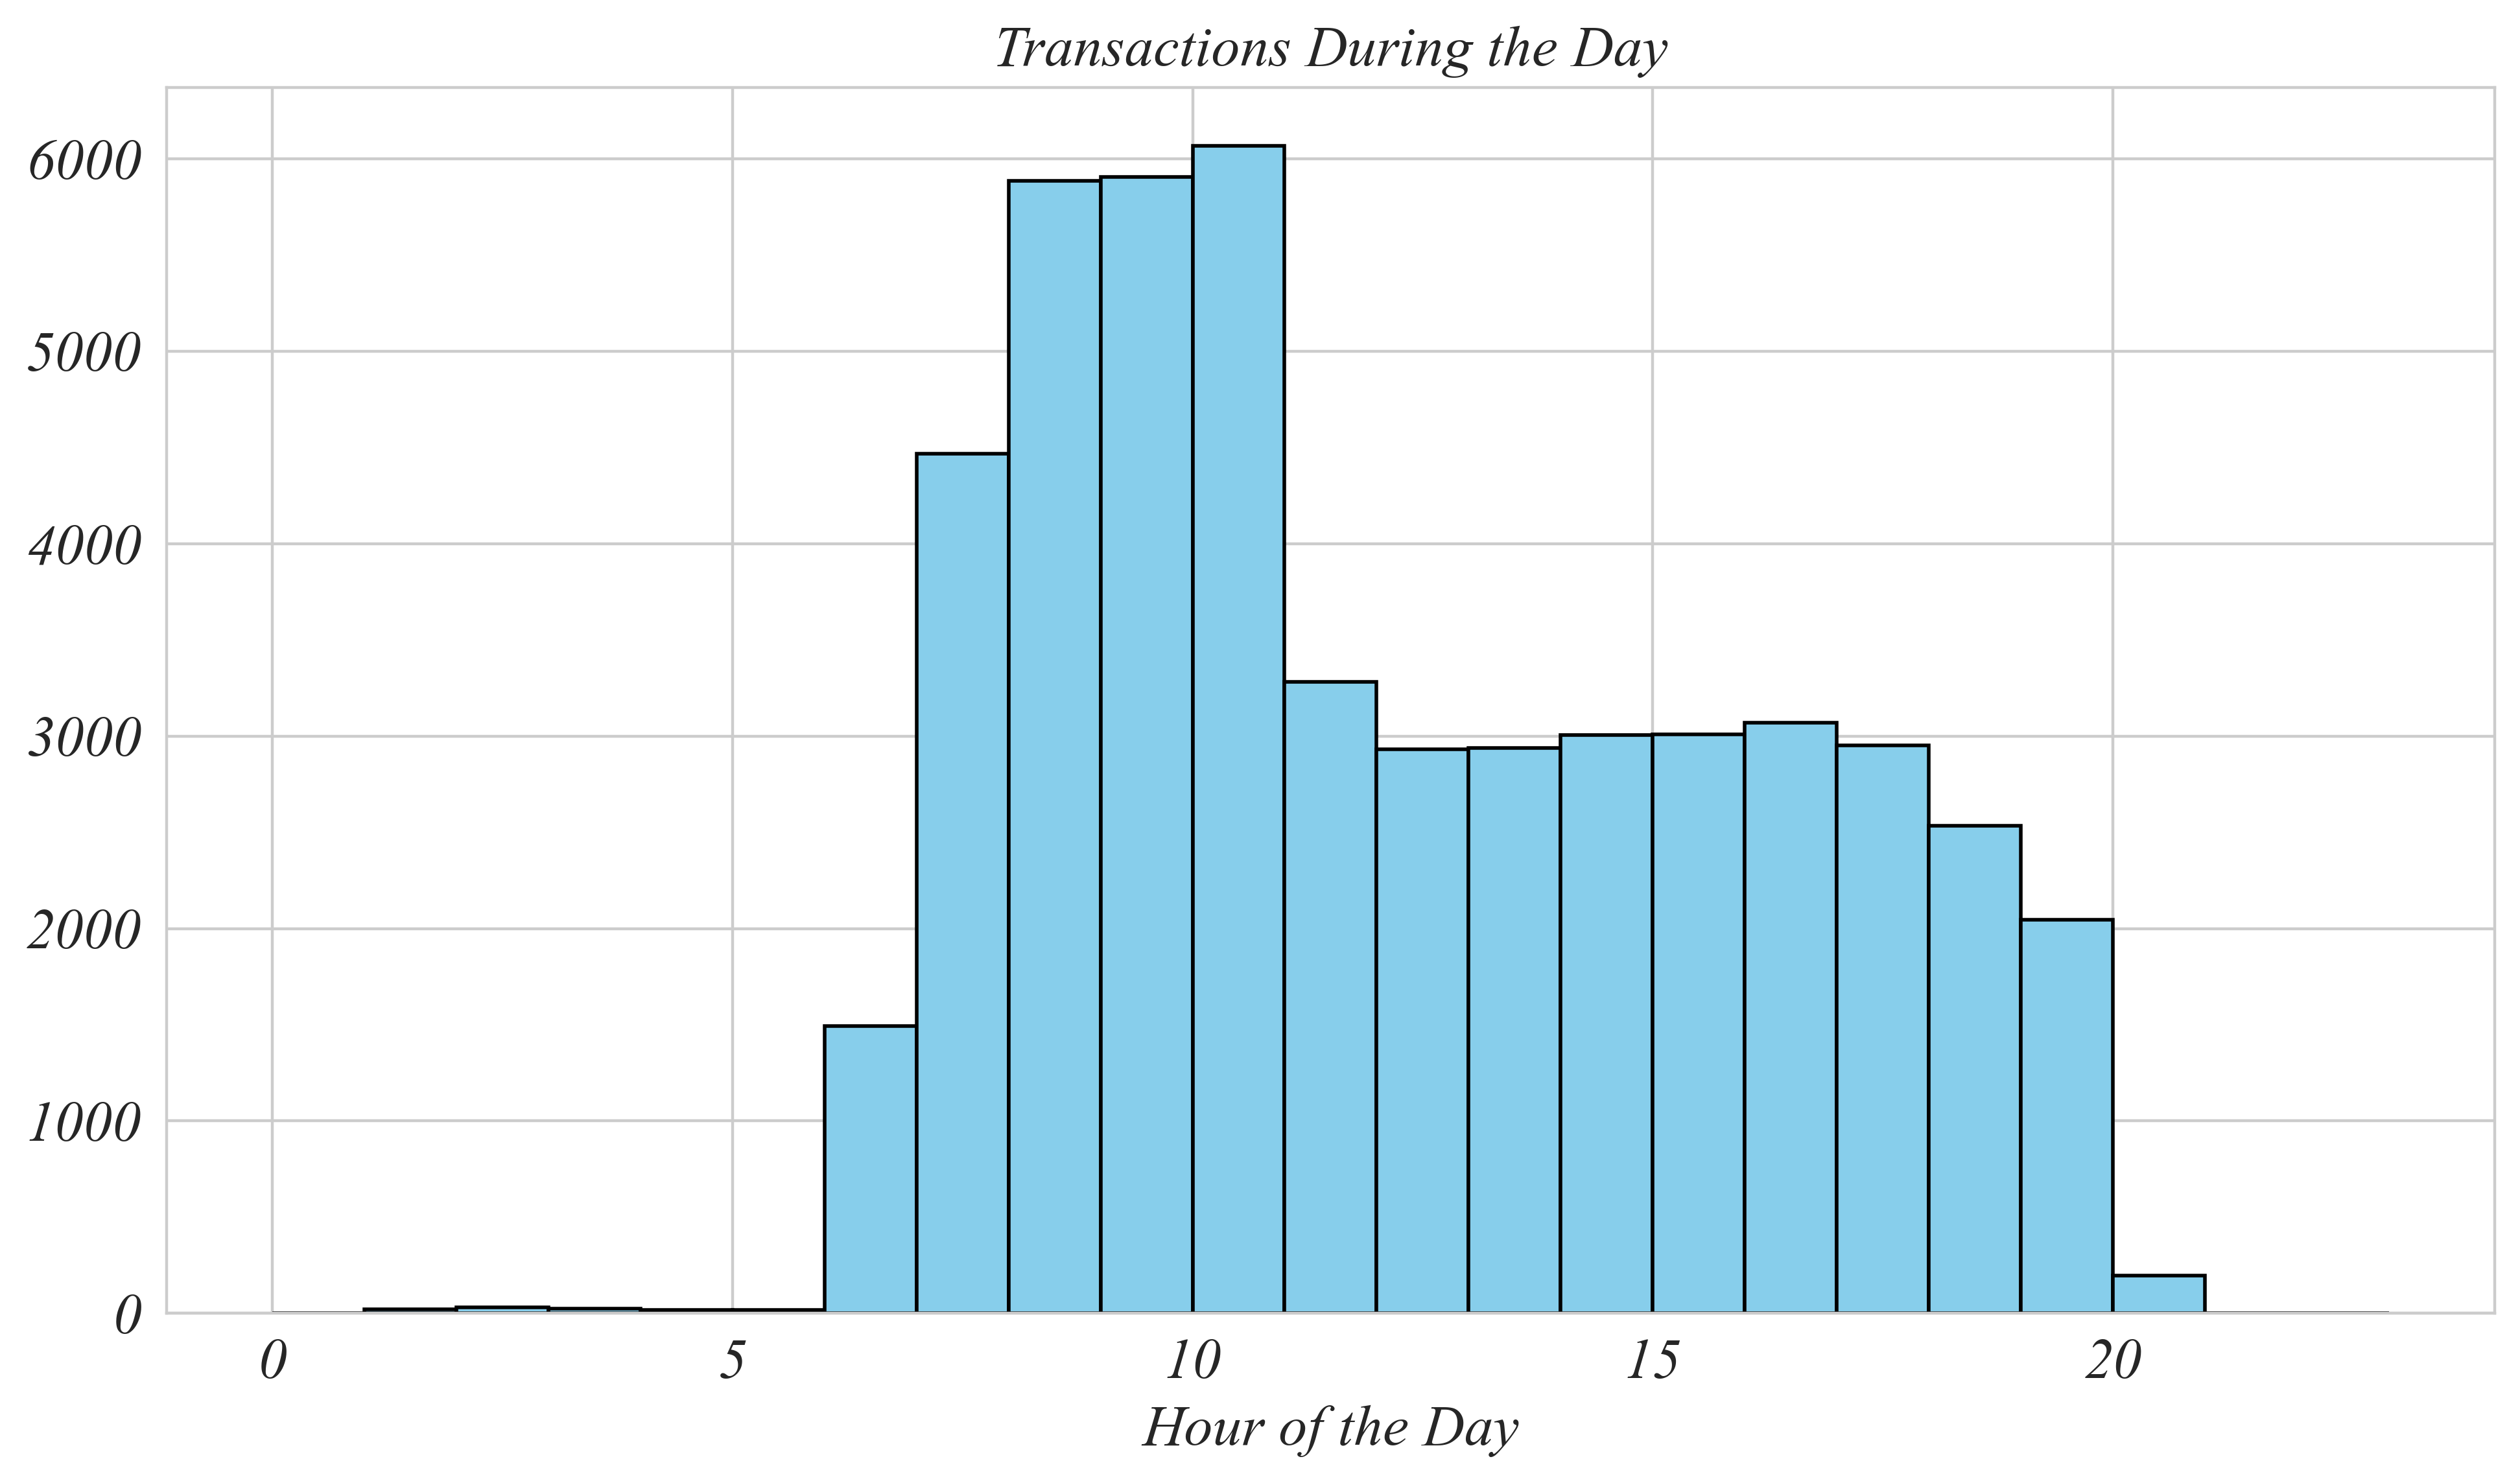

In [10]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

sales = pd.read_csv('Data/Part_1_3_Coffee_Sales_Reciepts.csv')

bins = range(0, 24, 1)
plt.hist(sales['Hours'], bins=bins, edgecolor='black', color='skyblue')

plt.xlabel('Hour of the Day')
plt.title('Transactions During the Day')
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Coffee_Shop_Transations_All_Hist.png')

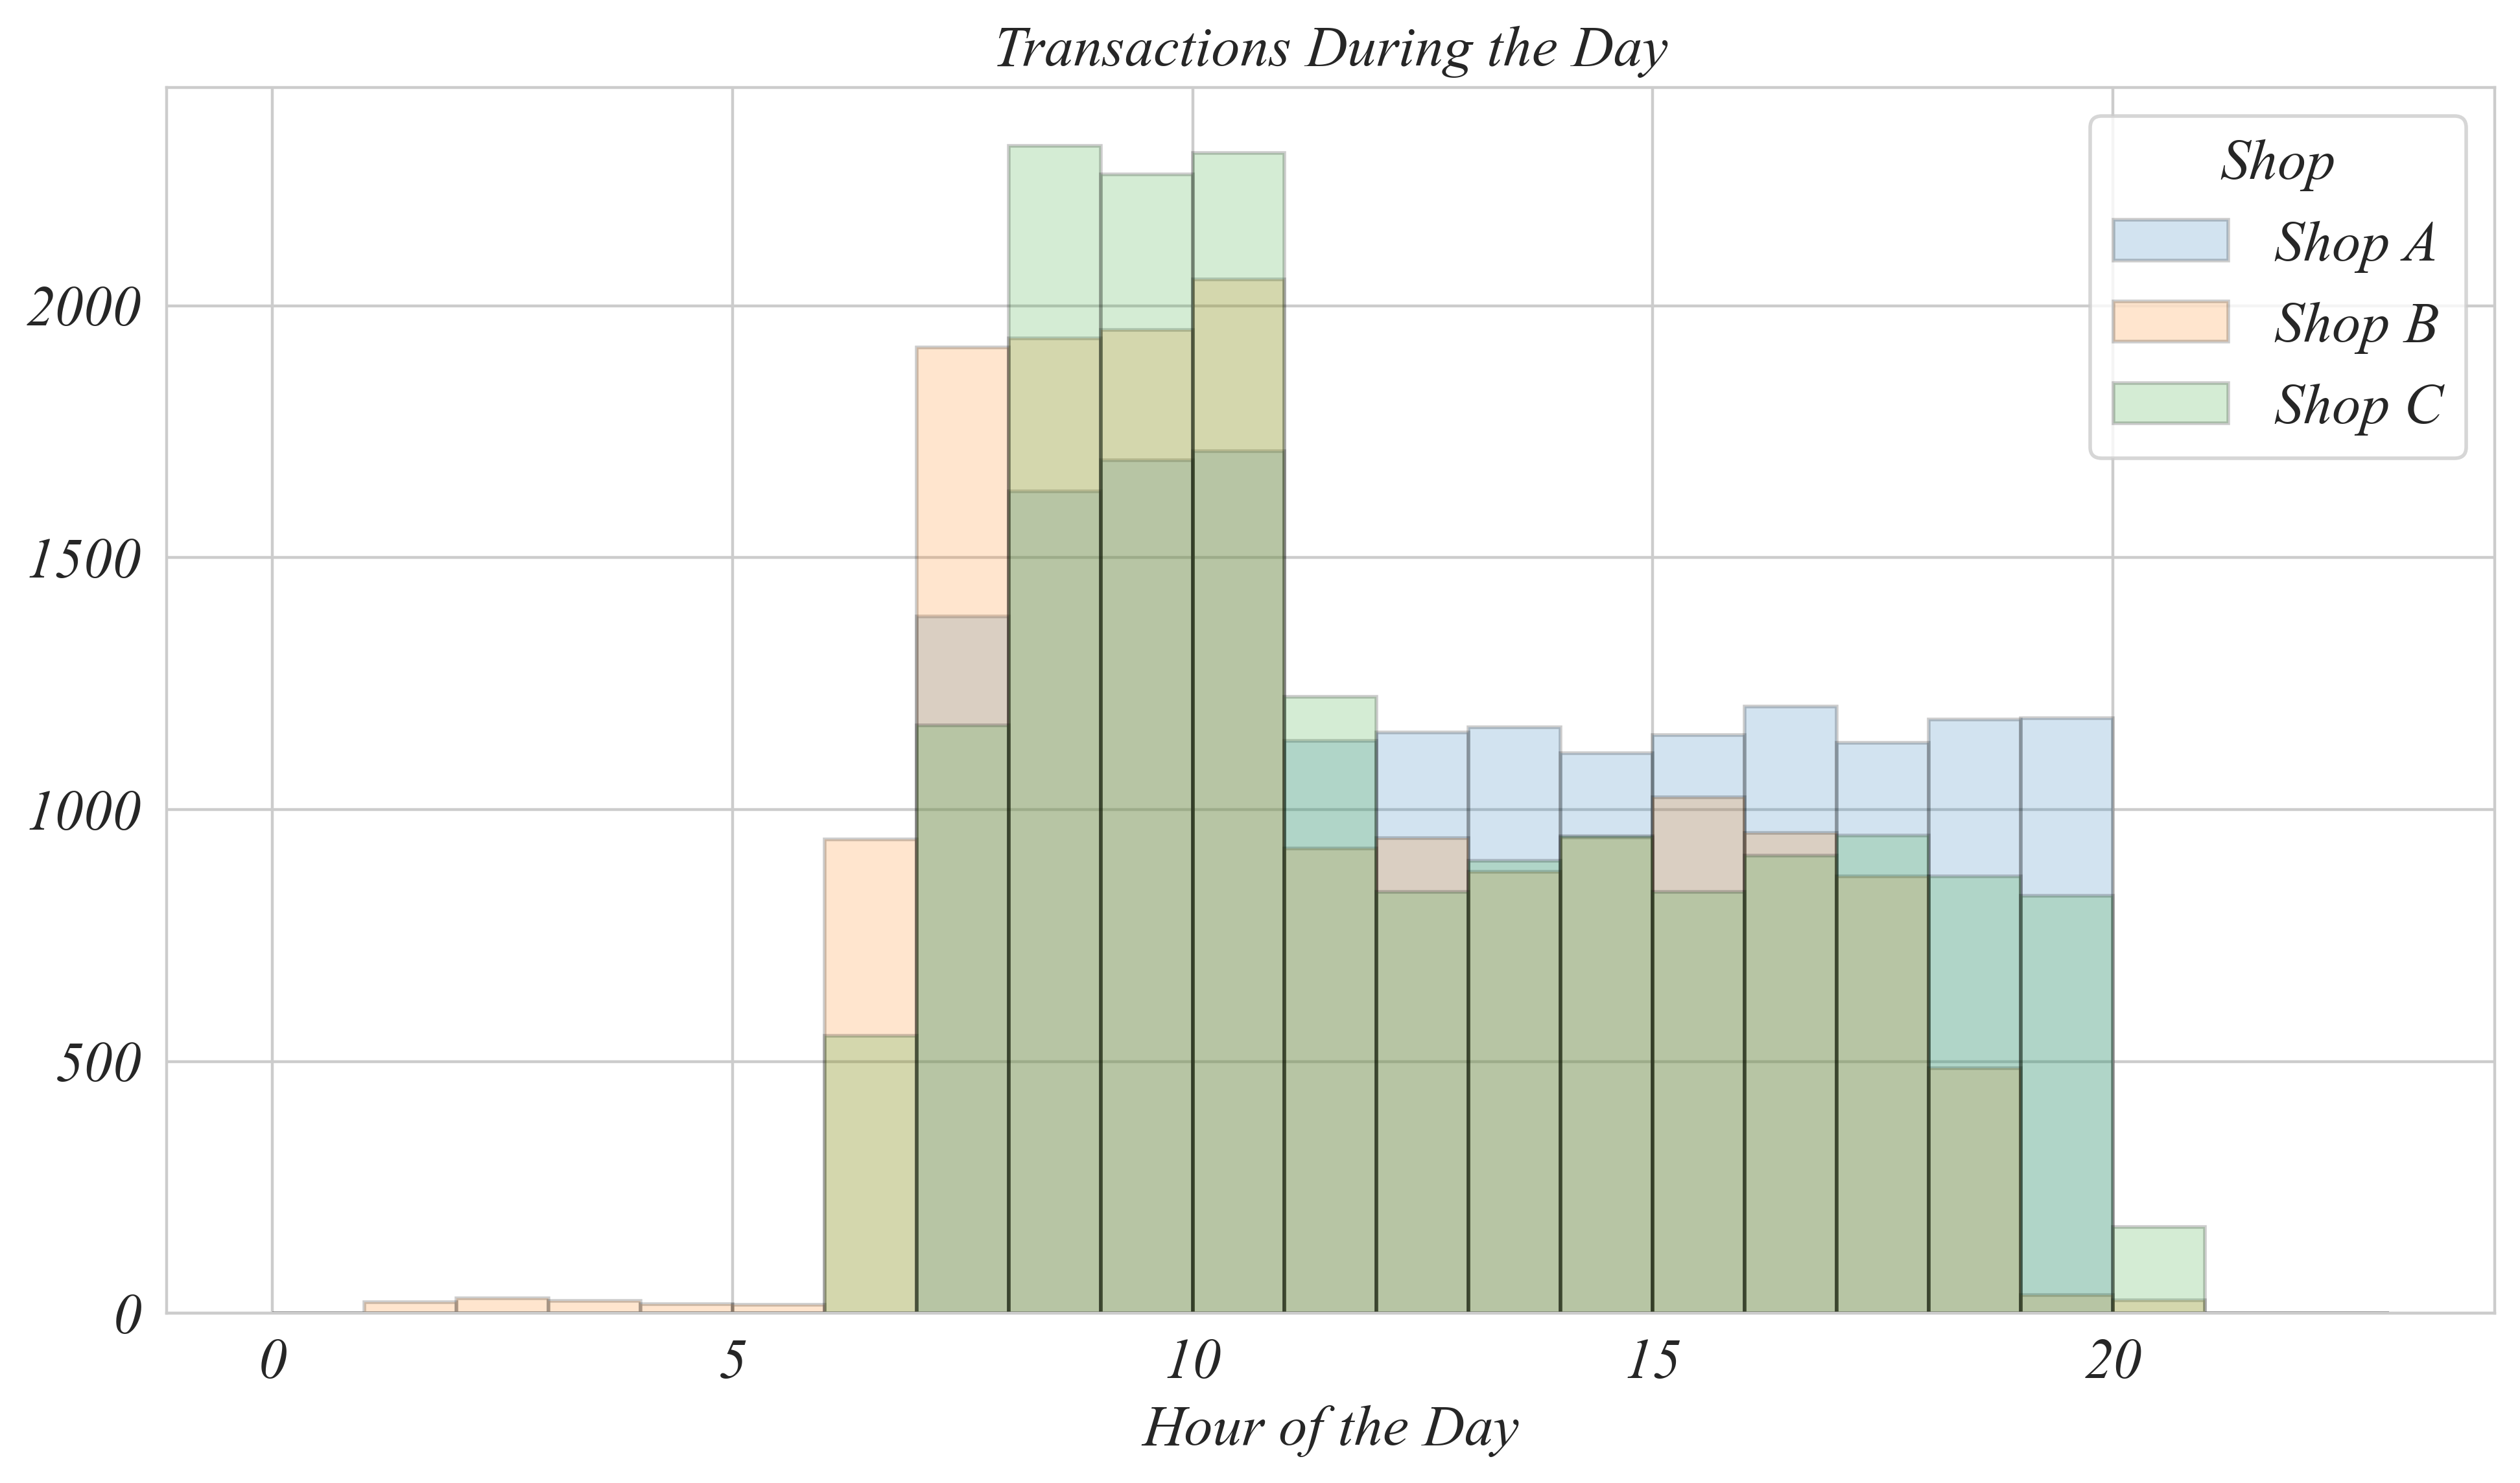

In [25]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

sales = pd.read_csv('Data/Part_1_3_Coffee_Sales_Reciepts.csv')

bins = range(0, 24, 1)
for shop in sales.Shop.unique():
    shop_sales = sales[sales.Shop == shop]
    plt.hist(shop_sales['Hours'], bins=bins, edgecolor='black', alpha=0.2, label=f'Shop {shop}')

plt.xlabel('Hour of the Day')
plt.title('Transactions During the Day')
plt.legend(title='Shop')
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Coffee_Shop_Transations_Shops_Hist.png')

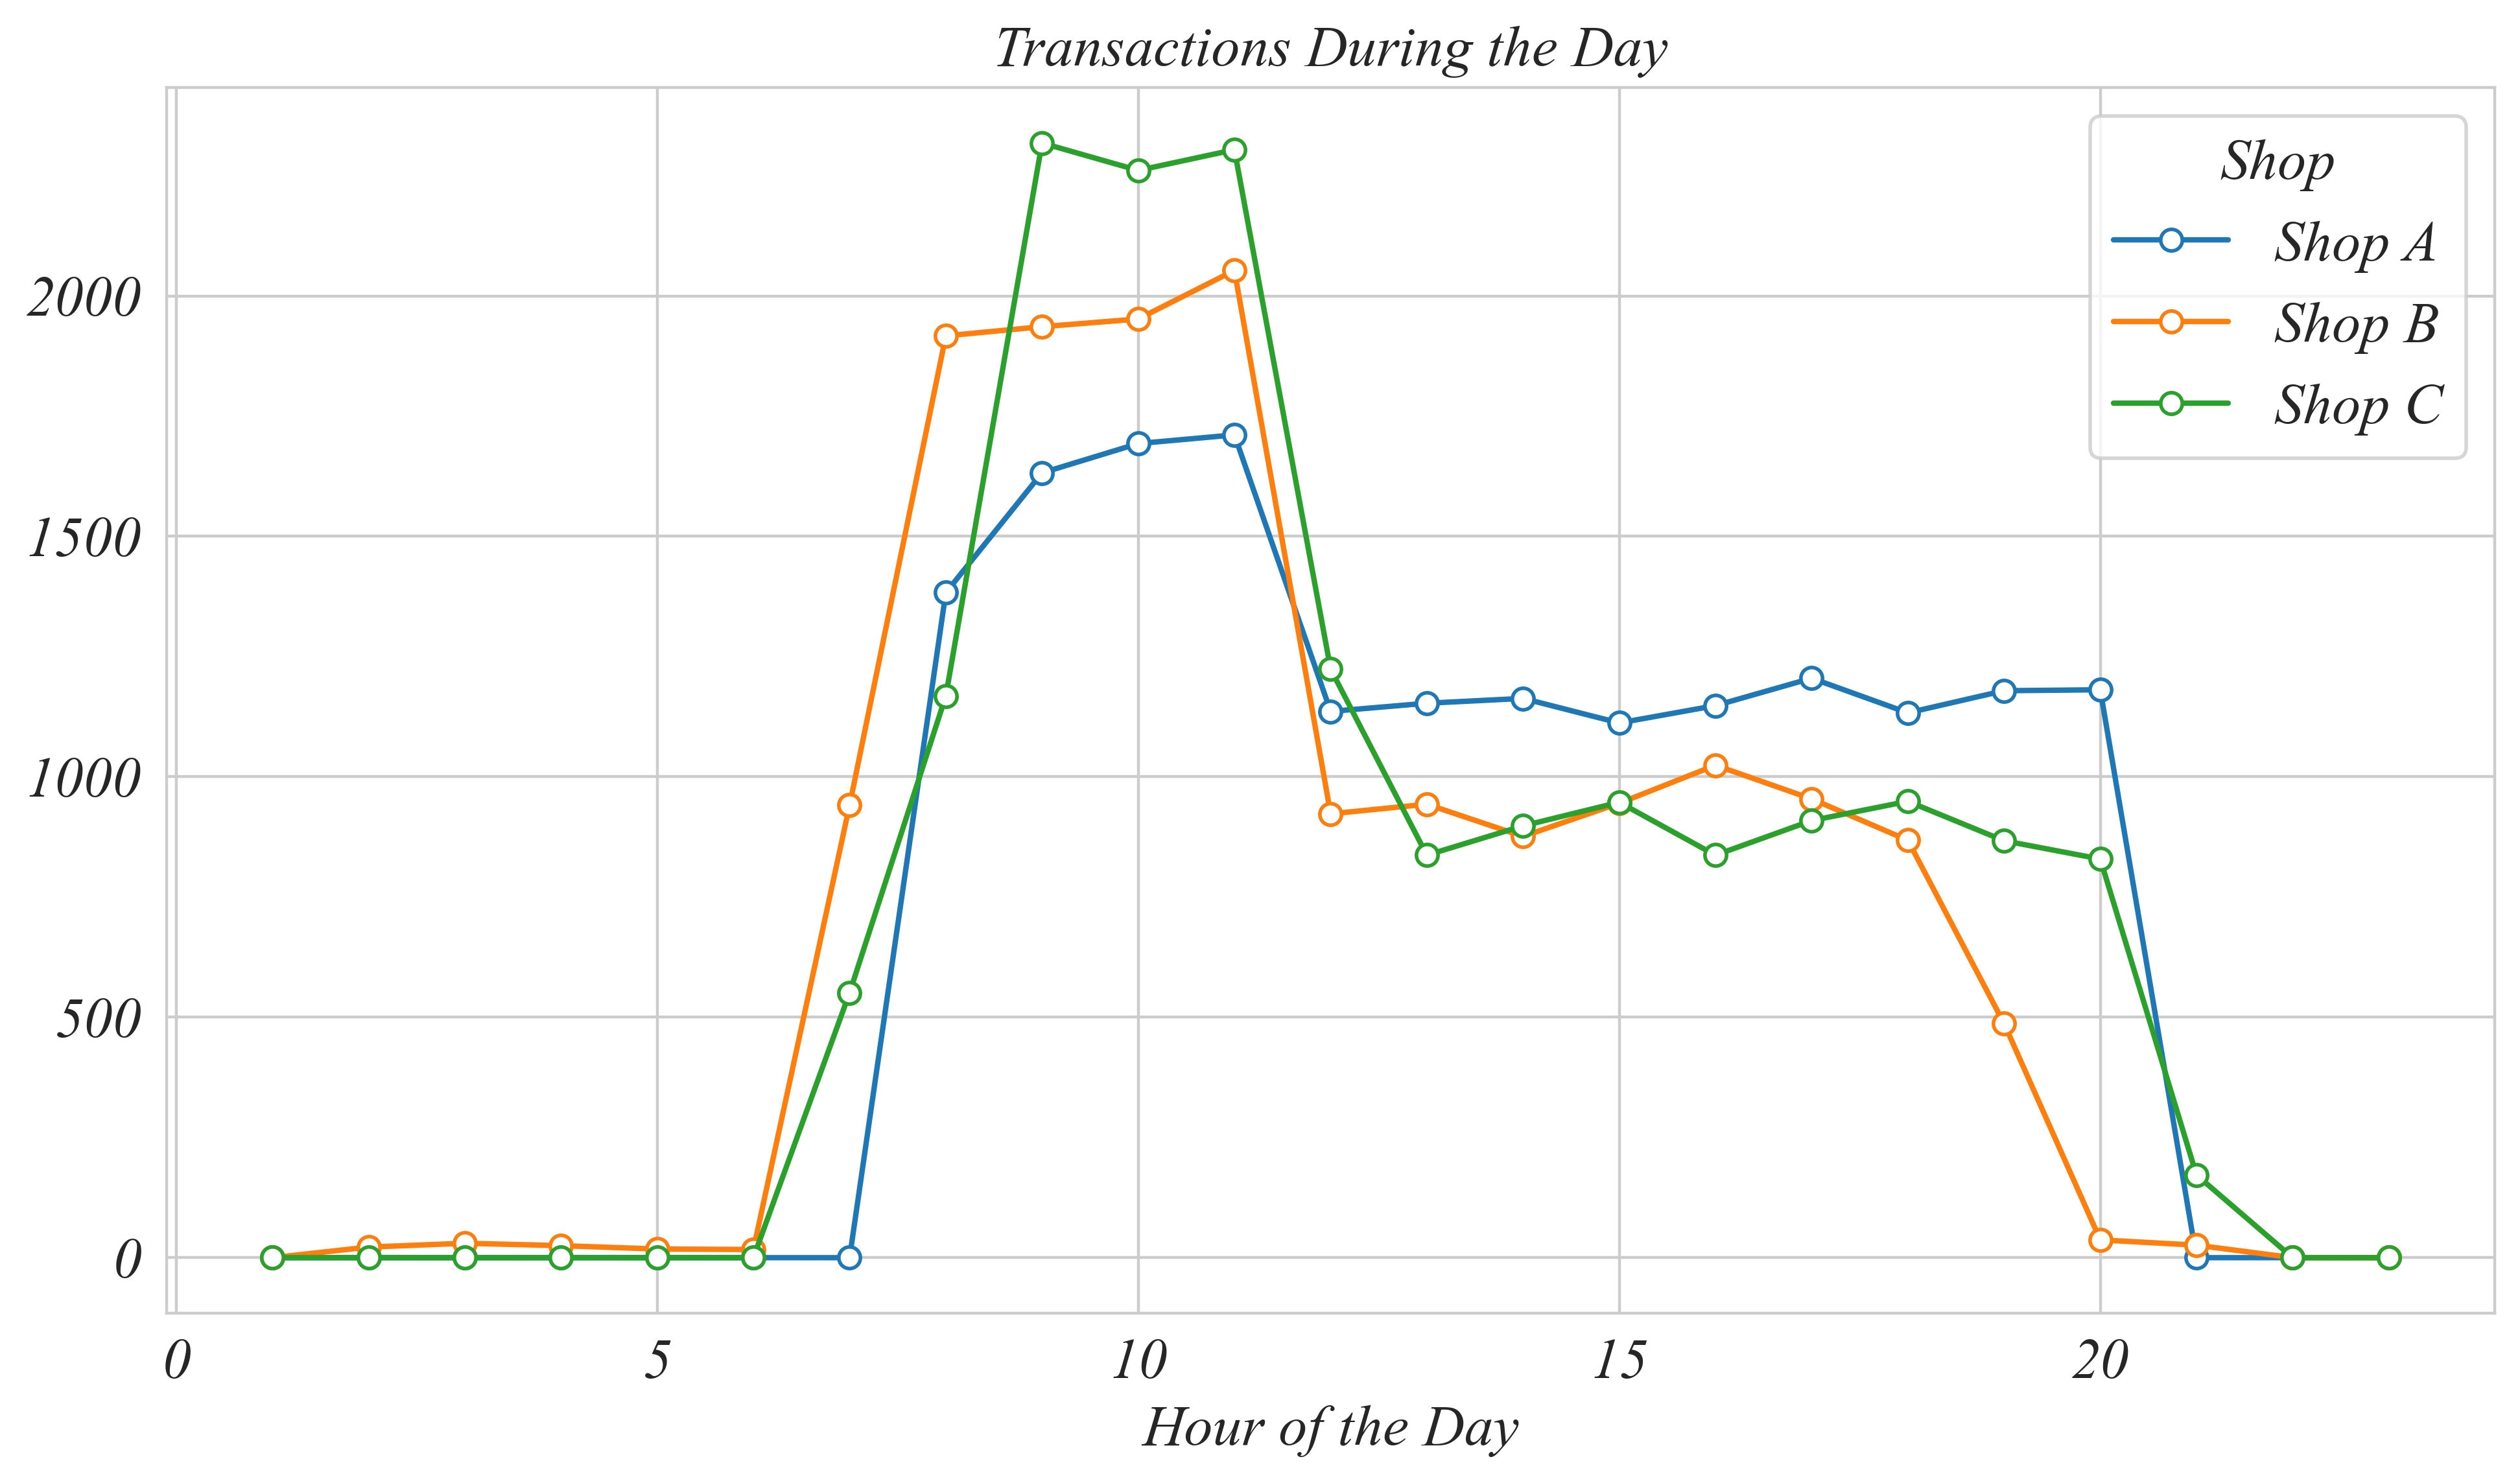

In [49]:
from Weidman_Figures import *
    
fig, axes = Weid_Fig()

sales = pd.read_csv('Data/Part_1_3_Coffee_Sales_Reciepts.csv')

bins = range(0, 24, 1)
for shop in sales.Shop.unique():
    shop_sales = sales[sales.Shop == shop]
    #plt.hist(shop_sales['Hours'], bins=bins, edgecolor='black', alpha=0.2, label=f'Shop {shop}')

    counts = pd.cut(shop_sales['Hours'], bins=bins, right=False, include_lowest=True).value_counts().sort_index()

    plt.plot(bins[1:], counts, marker='o', markerfacecolor='white', label=f'Shop {shop}')

plt.xlabel('Hour of the Day')
plt.title('Transactions During the Day')
plt.legend(title='Shop')
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Coffee_Shop_Transactions_Shops_Line.png')